In [1]:
get_ipython().run_line_magic("matplotlib", "notebook")

In [67]:
import os
import re
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LSSTmetrics.efficiencyTable import EfficiencyTable as eft
from matplotlib.colors import ListedColormap

## Set plotting colors and styles

In [68]:
sns.set_style("whitegrid")
sns.set_context("paper")

circular = sns.color_palette("colorblind", 10)
sequential = sns.cubehelix_palette(10, start=0.5, rot=-0.75)
diverging = sns.color_palette("RdBu", 10)
circ_mpl = ListedColormap(circular)
seq_mpl = ListedColormap(sequential)
div_mpl = ListedColormap(diverging)
sns.set_palette(circular)

<IPython.core.display.Javascript object>


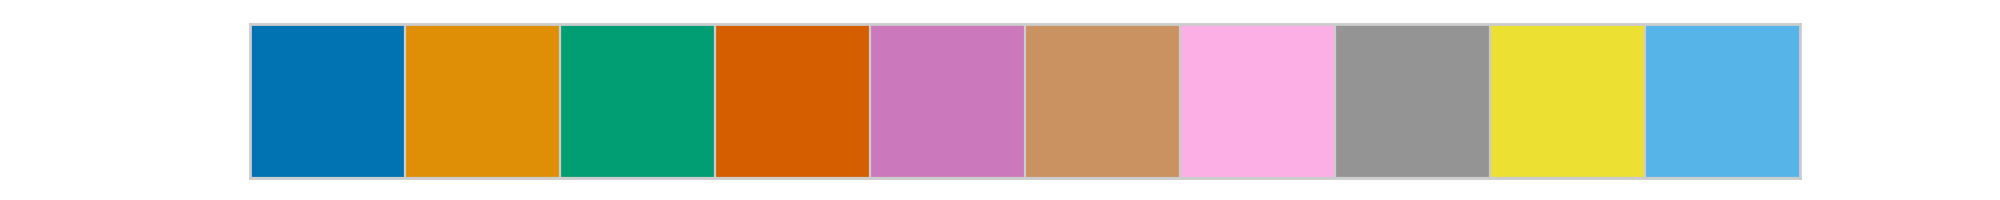

In [4]:
sns.palplot(circular)

<IPython.core.display.Javascript object>


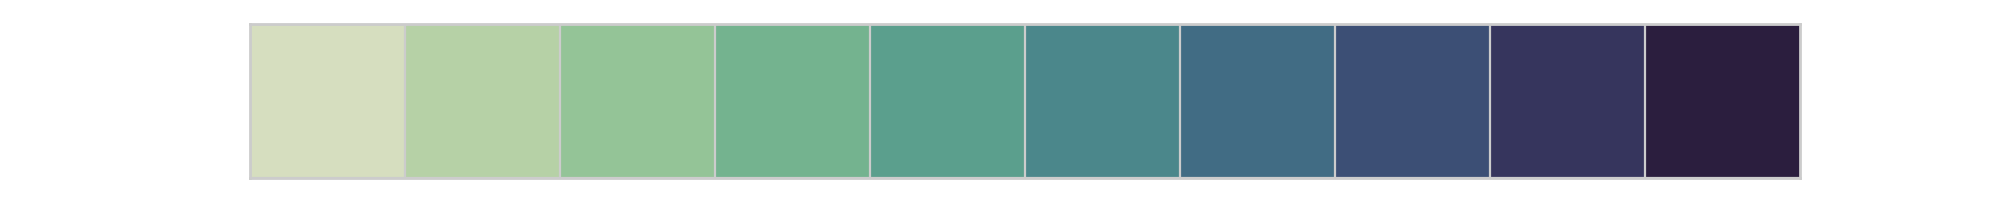

In [5]:
sns.palplot(sequential)

<IPython.core.display.Javascript object>


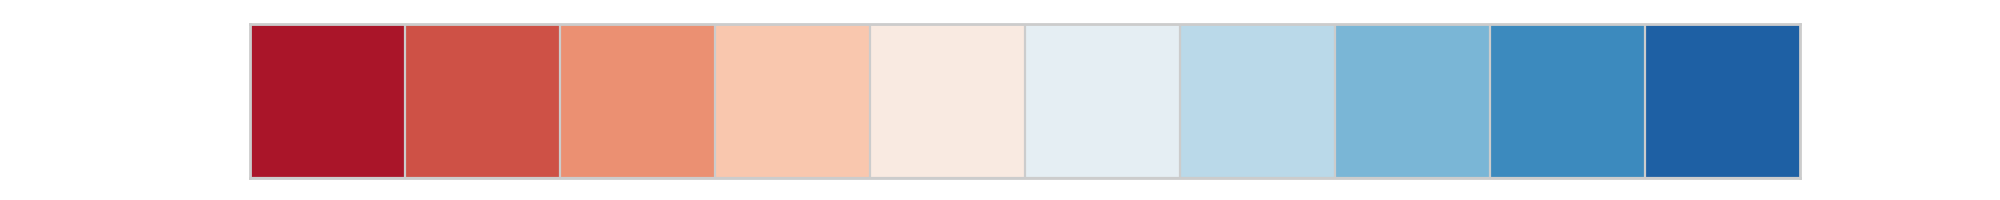

In [6]:
sns.palplot(diverging)

## Get the cadence sim results

In [7]:
detect_function = eft.fromDES_EfficiencyFile(
    "/Users/cnsetzer/software/Cadence/LSSTmetrics/example_data/SEARCHEFF_PIPELINE_DES.DAT"
)

sim_results_folder = (
    "/Users/cnsetzer/Documents/LSST/astrotog_output/paper_results/seed0/"
)
plot_output = "/Users/cnsetzer/Documents/LSST/astrotog/paper/detectability/figures/"

In [8]:
info_columns = [
    "model",
    "cadence",
    "N_scolnic",
    "N_scolnic_nocd",
    "N_scolnic_like",
    "N_scolnic_like_nocd",
    "N_cowperthwaite",
    "N_cowperthwaite_nocd",
    "N_cowperthwaite_like",
    "N_cowperthwaite_like_nocd",
]

sim_info = pd.DataFrame(columns=info_columns)

In [9]:
# lists in which to store certain data
param_store = {}
param_store["baseline"] = {}
param_store["best"] = {}
detect_store = {}
detect_store["baseline"] = {}
detect_store["best"] = {}

In [10]:
results_iter = iter(os.listdir(sim_results_folder))
i = -1

## Place to start iter and restart iter for single cadence information

In [53]:
results_folder = next(results_iter)
i += 1
print(results_folder)
obs_df = pd.read_csv(
    sim_results_folder + results_folder + "/observations.csv", index_col=0
)
param_df = pd.read_csv(
    sim_results_folder + results_folder + "/modified_parameters.csv", index_col=0
)
coadd_obs_df = pd.read_csv(
    sim_results_folder + results_folder + "/coadded_observations.csv", index_col=0
)
sd = pd.read_csv(
    sim_results_folder + results_folder + "/scolnic_detections.csv", index_col=0
)
sdnc = pd.read_csv(
    sim_results_folder + results_folder + "/scolnic_detections_no_coadd.csv",
    index_col=0,
)
sld = pd.read_csv(
    sim_results_folder + results_folder + "/scolnic_like_detections.csv", index_col=0
)
sldnc = pd.read_csv(
    sim_results_folder + results_folder + "/scolnic_like_detections_no_coadd.csv",
    index_col=0,
)
cd = pd.read_csv(
    sim_results_folder + results_folder + "/cowperthwaite_detections.csv", index_col=0
)
cdnc = pd.read_csv(
    sim_results_folder + results_folder + "/cowperthwaite_detections_no_coadd.csv",
    index_col=0,
)
cld = pd.read_csv(
    sim_results_folder + results_folder + "/cowperthwaite_like_detections.csv",
    index_col=0,
)
cldnc = pd.read_csv(
    sim_results_folder + results_folder + "/cowperthwaite_like_detections_no_coadd.csv",
    index_col=0,
)

lsst_saee_nsbh_kraken2026_181118_011924


In [56]:
folder_splits = results_folder.split("_")
for split in folder_splits:
    if re.search("desgw", split):
        model = "Single KN"
    elif re.search("nsbh", split):
        model = "Pop. NSBH"
    elif re.search("nsns", split):
        model = "Pop. BNS"
    elif re.search("kraken2026", split):
        cadence = "opsim_baseline"
    elif re.search("kraken2042", split):
        cadence = "opsim_single_exp"
    elif re.search("nexus2097", split):
        cadence = "opsim_large_rolling_3yr"
    elif re.search("pontus2002", split):
        cadence = "opsim_large"
    elif re.search("pontus2489", split):
        cadence = "opsim_20s_exp"
    elif re.search("pontus2573", split):
        cadence = "slair_mixed_filter_pairs"
    elif re.search("alt", split):
        cadence = "alt_sched_rolling"

if re.search('Single',model):
    plot_model_name = model.replace(" ", "_")
else:
    plot_model_name = model.replace(". ", "_")

if cadence == "pontus2573" and model == "Single KN":
    best = True
else:
    best = False
    
print(model)
print(cadence)

Pop. NSBH
opsim_baseline


## Single-cadence plots

### Plot One (Hexbin Parameters)

<IPython.core.display.Javascript object>


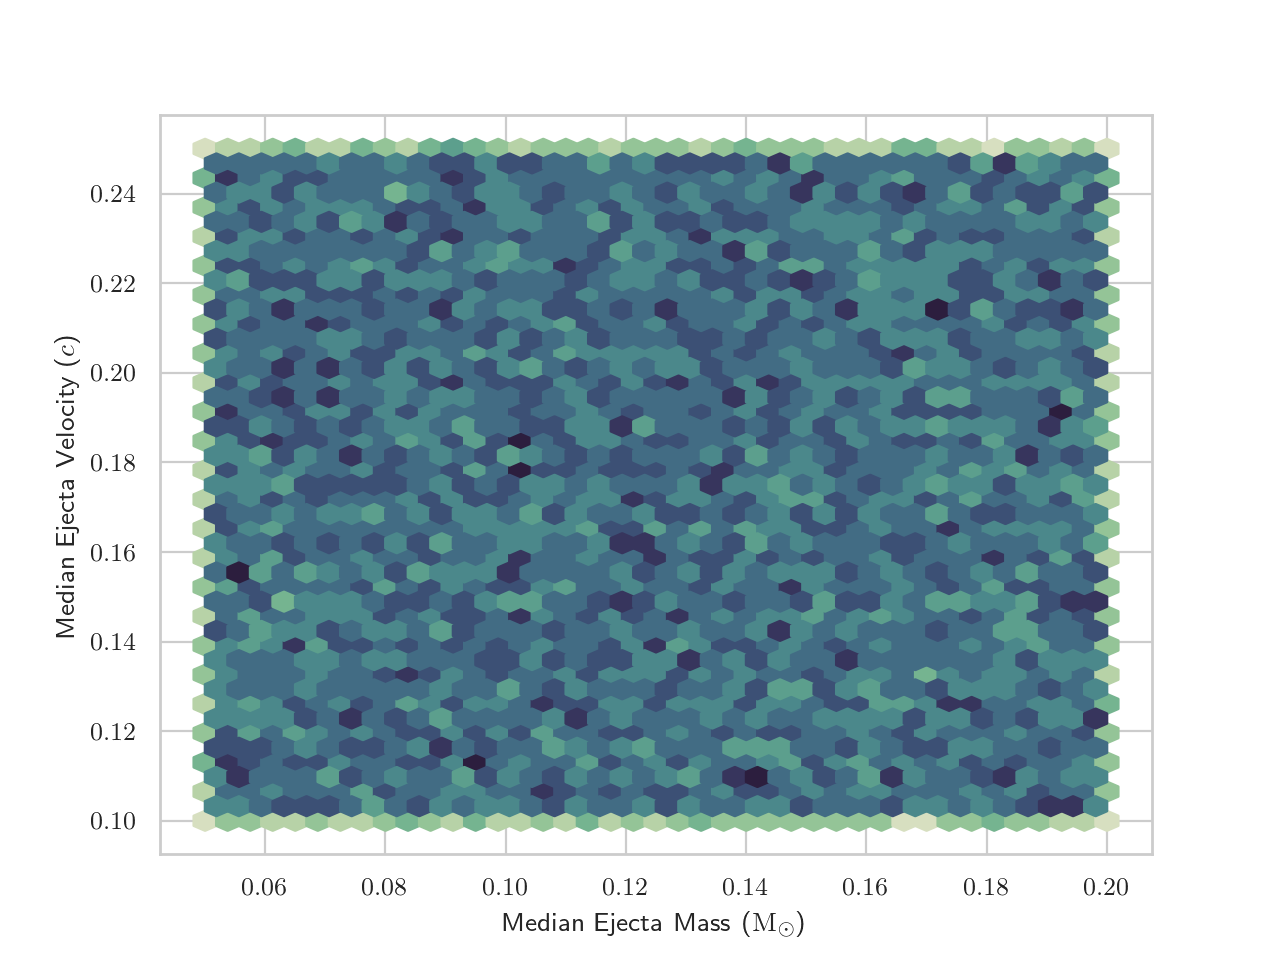

In [71]:

if re.search("Pop", model) and re.search("baseline", cadence):
    mej = param_df["m_ej"].values
    vej = param_df["v_ej"].values
    fig, ax = plt.subplots()
    plt.rc("text", usetex=True)
    # plt.rc('font', family='serif')
    ax.hexbin(mej, vej, gridsize=40, xscale="linear", yscale="linear",cmap=seq_mpl)
    if re.search("NSBH", model):
        pass
    else:
        ax.plot([0.15, 0.15], [0.0, 0.5])
        ax.plot([0.0, 0.2], [0.1, 0.1])
    ax.set_xlabel(r"Median Ejecta Mass ($\mathrm{M}_{\odot}$)")
    ax.set_ylabel(r"Median Ejecta Velocity ($c$)")
    fig.savefig(
        plot_output + "{0}_{1}_hexbin_params.pdf".format(plot_model_name, cadence),
        bbox_inches="tight",
    )
    plt.show()
#    plt.close(fig)

### Plot Two (Alert Plot)

In [ ]:
if re.search("baseline", cadence):
    obs_df.drop(["Alert_Probability"],axis=1,inplace=True)
    prob_df = pd.DataFrame(columns=["Alert_Probability"])
    obs_df.join(prob_df)
    prob_mask = obs_df["signal_to_noise"] >= 50.0
    inv_mask = obs_df["signal_to_noise"] < 50.0
    snr_mask = obs_df["signal_to_noise"] >= 5.0
    obs_df.loc[prob_mask, "Alert_Probability"] = 1.0
    
    for index, row in obs_df.loc[inv_mask].iterrows():
        row["Alert_Probability"] = detect_function.effSNR(
            row["bandfilter"],
            row["signal_to_noise"],
        )
    obs_df["max_snr"] = obs_df.groupby(["transient_id"])["signal_to_noise"].transform(
        max
    )
    obs_df["tot_alert_prob"] = obs_df.grouby(["transient_id"])[
        "Alert_Probability"
    ].transform(sum)
    max_snr = obs_df.drop_duplicates(subset="transient_id", keep="first")[
        "max_snr"
    ].values
    max_snr2 = (
        obs_df.loc[snr_mask]
        .drop_duplicates(subset="transient_id", keep="first")["max_snr"]
        .values
    )
    tot_alert_prob = obs_df.drop_duplicates(subset="transient_id", keep="first")[
        "tot_alert_prob"
    ].values

    fig, ax = plt.subplots()
    n, bins, = ax.hist(
        max_snr,
        bins=50,
        range=(0, 50),
        weights=tot_alert_prob,
        histtype="bar",
        log=True,
        #        color="k",
    )
    ax.hist(
        max_snr2,
        bins=bins,
        histtype="bar",
        alpha=0.3,
        log=True,
        #        color="k",
    )
    ax.set_ylabel("Counts")
    ax.set_xlabel("Maximum SNR")
    ax.legend(["Alerts", r"$SNR\gt5$"])
    fig.savefig(
        plot_output + "{0}_{1}_alert_prob_hist.pdf".format(plot_model_name, cadence),
        bbox_inches="tight",
    )
    plt.close(fig)

### Redshift distribution plots for different detect types

In [50]:
# Plot eight redshift distribution of each type of detections for baseline

dtype_toshow = ["sd", "sld", "cd", "cld"]

if (re.search("baseline", cadence)) or best:
    z_min = 0.0
    z_max = 0.75
    bin_size = 0.025
    n_bins = int(round((z_max - z_min) / bin_size))
    all_zs = list(param_df["true_redshift"])

    for dtype in dtype_toshow:
        dlist = list(globals()[dtype]["transient_id"].unique())
        detect_zs = list(
            param_df[param_df["transient_id"].isin(dlist)]["true_redshift"]
        )
        # Create the histogram
        fig = plt.subplots()
        n, bins, patches = ax.hist(
            x=all_zs,
            bins=n_bins,
            range=(z_min, z_max),
            histtype="step",
            color=circular,
            label="All Sources",
            linewidth=3.0,
        )
        ndetect, bins, patches = ax.hist(
            x=detect_zs,
            bins=bins,
            histtype="stepfilled",
            edgecolor=circular,
            color=circular,
            alpha=0.3,
            label="Detected Sources",
        )
        # plt.tick_params(which='both', length=10, width=1.5)
        ax.yscale("log")
        ax.legend(loc=2)
        ax.set_xlabel("z")
        ax.set_ylabel(r"$N(z)$")
        fig.savefig(
            plot_output
            + "{0}_{1}_redshift_dist_{2}.pdf".format(plot_model_name, cadence, dtype),
            bbox_inches="tight",
        )
        plt.close(fig)

    # Create the histogram
    fig = plt.subplots()
    n, bins, patches = ax.hist(
        x=all_zs,
        bins=n_bins,
        range=(z_min, z_max),
        histtype="step",
        label="All Sources",
        linewidth=3.0,
    )
    for j, dtype in enumerate(dtype_toshow):
        dlist = list(globals()[dtype]["transient_id"].unique())
        detect_zs = list(
            param_df[param_df["transient_id"].isin(dlist)]["true_redshift"]
        )
        ax.hist(
            x=detect_zs,
            bins=bins,
            histtype="stepfilled",
            alpha=0.3,
            label="Det. Metric {}".format(j),
        )
    # plt.tick_params(which='both', length=10, width=1.5)
    ax.yscale("log")
    ax.legend(loc=2)
    ax.set_xlabel("z")
    ax.set_ylabel(r"$N(z)$")
    fig.savefig(
        plot_output
        + "{0}_{1}_combined_redshift_dist.pdf".format(plot_model_name, cadence),
        bbox_inches="tight",
    )
    plt.close(fig)

## Store cadence information for multi-cadence plots

In [51]:
# Save data for plots four, five, six, and seven
sim_info.at[i, "model"] = model
sim_info.at[i, "cadence"] = cadence
sim_info.at[i, "N_scolnic"] = len(sd["transient_id"].unique())
sim_info.at[i, "N_scolnic_nocd"] = len(sdnc["transient_id"].unique())
sim_info.at[i, "N_scolnic_like"] = len(sld["transient_id"].unique())
sim_info.at[i, "N_scolnic_like_nocd"] = len(sldnc["transient_id"].unique())
sim_info.at[i, "N_cowperthwaite"] = len(cd["transient_id"].unique())
sim_info.at[i, "N_cowperthwaite_nocd"] = len(cdnc["transient_id"].unique())
sim_info.at[i, "N_cowperthwaite_like"] = len(cld["transient_id"].unique())
sim_info.at[i, "N_cowperthwaite_like_nocd"] = len(cldnc["transient_id"].unique())

In [52]:
# Plot Three of Number of lightcurve points
if re.search("baseline", cadence):
    detect_store["baseline"][model] = {}
    detect_store["baseline"][model]["sd"] = sd
    detect_store["baseline"][model]["sdnc"] = sdnc
    detect_store["baseline"][model]["sld"] = sld
    detect_store["baseline"][model]["sldnc"] = sldnc
    detect_store["baseline"][model]["cd"] = cd
    detect_store["baseline"][model]["cdnc"] = cdnc
    detect_store["baseline"][model]["cld"] = cld
    detect_store["baseline"][model]["cldnc"] = cldnc
    param_store["baseline"][model] = param_df
elif best:
    detect_store["best"][model] = {}
    detect_store["best"][model]["sd"] = sd
    detect_store["best"][model]["sdnc"] = sdnc
    detect_store["best"][model]["sld"] = sld
    detect_store["best"][model]["sldnc"] = sldnc
    detect_store["best"][model]["cd"] = cd
    detect_store["best"][model]["cdnc"] = cdnc
    detect_store["best"][model]["cld"] = cld
    detect_store["best"][model]["cldnc"] = cldnc
    param_store["best"][model] = param_df
else:
    pass

## Multi-cadence plots

In [ ]:
dtype_toshow = "sd"  # detection type
borb = "baseline"  # 'baseline' or 'best'

all_zs = list(param_df["true_redshift"].values)
detect_zs1 = list(
    param_df[
        param_df["transient_id"].isin(
            list(detect_store[borb]["Single KN"][dtype_toshow]["transient_id"].unique())
        )
    ]["true_redshift"]
)
detect_zs2 = list(
    param_df[
        param_df["transient_id"].isin(
            list(detect_store[borb]["Pop. BNS"][dtype_toshow]["transient_id"].unique())
        )
    ]["true_redshift"]
)
# Create the histogram
fig = plt.subplots()
n, bins, patches = ax.hist(
    x=all_zs,
    bins=n_bins,
    range=(z_min, z_max),
    histtype="step",
    label="All Sources",
    linewidth=3.0,
)
ndetect, bins, patches = ax.hist(
    x=detect_zs1,
    bins=bins,
    histtype="stepfilled",
    #    edgecolor="blue",
    #    color="blue",
    alpha=0.3,
    label="Single KN",
)
ndetect, bins, patches = ax.hist(
    x=detect_zs2,
    bins=bins,
    histtype="stepfilled",
    #    edgecolor="blue",
    #    color="blue",
    alpha=0.3,
    label="Pop. BNS",
)
# plt.tick_params(which='both', length=10, width=1.5)
ax.axvline(x=0.102, linestyle="--", color="k")
ax.text(0.11, 500, "LIGO A+ Sensitivity", rotation=90, fontsize=int(13))
ax.axvline(x=0.204, linestyle="-.", color="k")
ax.text(0.21, 500, "LIGO Voyager Sensitivity", rotation=90, fontsize=int(13))
ax.axvline(x=0.5, linestyle="-", color="k")
ax.text(0.507, 1100, "Einstein Telescope Sensitivity", rotation=90, fontsize=int(13))
# plt.tick_params(which='both', length=10, width=1.5)
ax.yscale("log")
ax.legend(loc="best")
ax.set_xlabel("z")
ax.set_ylabel(r"$N(z)$")
fig.savefig(
    plot_output + "{0}_combined_redshift_dist_{1}.pdf".format(borb, dtype_toshow),
    bbox_inches="tight",
)
plt.close(fig)

In [ ]:
# Plot the number light curve points for a detect type between baseline and best
dtype_toshow = "sd"
model_to_show = "Single KN"

base_nlc = (
    detect_store["baseline"][model_to_show][dtype]
    .grouby(["transient_id"])
    .aggregate(size)
)
best_nlc = (
    detect_store["best"][model_to_show][dtype].grouby(["transient_id"]).aggregate(size)
)

fig, ax = plt.subplots()
n, bins, = ax.hist(x=base_nlc, bins=30, histtype="bar", label="Baseline", alpha=0.4)
ax.hist(x=best_nlc, bins=bins, histtype="bar", label="Best", alpha=0.4)
# sd.grouby(["transient_id", "bandfilter"]).aggregate(size)
ax.yscale("log")
ax.legend(loc="best")
ax.set_xlabel("Number of Points on Light Curve")
ax.set_ylabel("Number of Detections")
fig.savefig(
    plot_output + "number_lc_points_{1}_{0}.pdf".format(model, dtype_toshow),
    bbox_inches="tight",
)
plt.close(fig)

In [ ]:
# Plot detection counts NSNS
dtype_toshow = "N_scolnic"
fig, ax = plt.subplots()
desgw = sim_info.query("model == 'Single KN'")
nsns = sim_info.query("model == 'Pop. BNS'")
ax.errorbar(
    desgw["cadence"],
    desgw[dtype_toshow],
    yerr=np.sqrt(desgw[dtype_toshow]),
    fmt="o",
    capsize=6,
)
ax.errorbar(
    nsns["cadence"],
    nsns[dtype_toshow],
    yerr=np.sqrt(nsns[dtype_toshow]),
    fmt="o",
    capsize=6,
)
ax.axhline(scolnic_value)
ax.legend(["Single Event", "Pop. Model", "Scolnic et al. 2017"])
fig.savefig(plot_output + "NSNS_{}.pdf".format(dtype_toshow), bbox_inches="tight")
plt.close(fig)

In [ ]:
# Plot detection counts NSNS vs NSBH
dtype_toshow = "N_scolnic"
fig, ax = plt.subplots()
nsbh = sim_info.query("model == 'Pop. NSBH'")
nsns = sim_info.query("model == 'Pop. BNS'")
ax.errorbar(
    nsbh["cadence"],
    nsbh[dtype_toshow],
    yerr=np.sqrt(nsbh[dtype_toshow]),
    fmt="o",
    capsize=6,
)
ax.errorbar(
    nsns["cadence"],
    nsns[dtype_toshow],
    yerr=np.sqrt(nsns[dtype_toshow]),
    fmt="o",
    capsize=6,
)
ax.legend(["NSBH", "NSNS"])
fig.savefig(
    plot_output + "NSNS_v_NSBH_{}.pdf".format(dtype_toshow), bbox_inches="tight"
)
plt.close(fig)

In [ ]:
# Plot comparison of detection counts DESGW
model_to_show = "Single KN"
if re.search('Single',model):
    plot_model_name = model.replace(" ", "_")
else:
    plot_model_name = model.replace(". ", "_")
dtype_toshow = [
    "N_scolnic",
    "N_scolnic_like",
    "N_cowperthwaite",
    "N_cowperthwaite_like",
]

fig, ax = plt.subplots()
desgw = sim_info.query("model == {}".format(model_to_show))

for k, dtype in enumerate(dtype_toshow):
    ax.errorbar(
        desgw["cadence"],
        desgw[dtype],
        yerr=np.sqrt(desgw[dtype]),
        fmt="o",
        capsize=6,
        label="Det. Metric {}".format(k),
    )
ax.axhline(scolnic_value, label="Scolnic et al. 2017")
ax.legend()
fig.savefig(
    plot_output + "{}_detection_type_comparison.pdf".format(plot_model_name),
    bbox_inches="tight",
)
plt.close(fig)